**Q1:**
Load the dataset and explore its structure.
Check for missing values and handle them appropriately (e.g., imputation or removal).
Describe the dataset's key statistics (mean, median, standard deviation).

In [1]:
import pandas as pd

# Load the dataset (assuming it's a CSV file)
df = pd.read_csv('/content/drive/MyDrive/DailyDelhiClimateTrain.csv')

# Explore the structure of the dataset
print(df.info())
print(df.head())

# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB
None
         date   meantemp   humidity  wind_speed  meanpressure
0  2013-01-01  10.000000  84.500000    0.000000   1015.666667
1  2013-01-02   7.400000  92.000000    2.980000   1017.800000
2  2013-01-03   7.166667  87.000000    4.633333   1018.666667
3  2013-01-04   8.666667  71.333333    1.233333   1017.166667
4  2013-01-05   6.000000  86.833333    3.700000   1016.500000
date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64


In [2]:
# Handle missing values (example: fill with mean)
# Exclude the 'date' column from the mean calculation
numeric_columns = df.select_dtypes(include=['number']).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# Describe key statistics
print(df.describe())

          meantemp     humidity   wind_speed  meanpressure
count  1462.000000  1462.000000  1462.000000   1462.000000
mean     25.495521    60.771702     6.802209   1011.104548
std       7.348103    16.769652     4.561602    180.231668
min       6.000000    13.428571     0.000000     -3.041667
25%      18.857143    50.375000     3.475000   1001.580357
50%      27.714286    62.625000     6.221667   1008.563492
75%      31.305804    72.218750     9.238235   1014.944901
max      38.714286   100.000000    42.220000   7679.333333


**Q2:**

**Time Series Visualization:**

Plot the time series for all variables (e.g., daily mean temperature and precipitation).
Use subplots to visualize the relationship between temperature (mean, max, min) and wind speed over time.

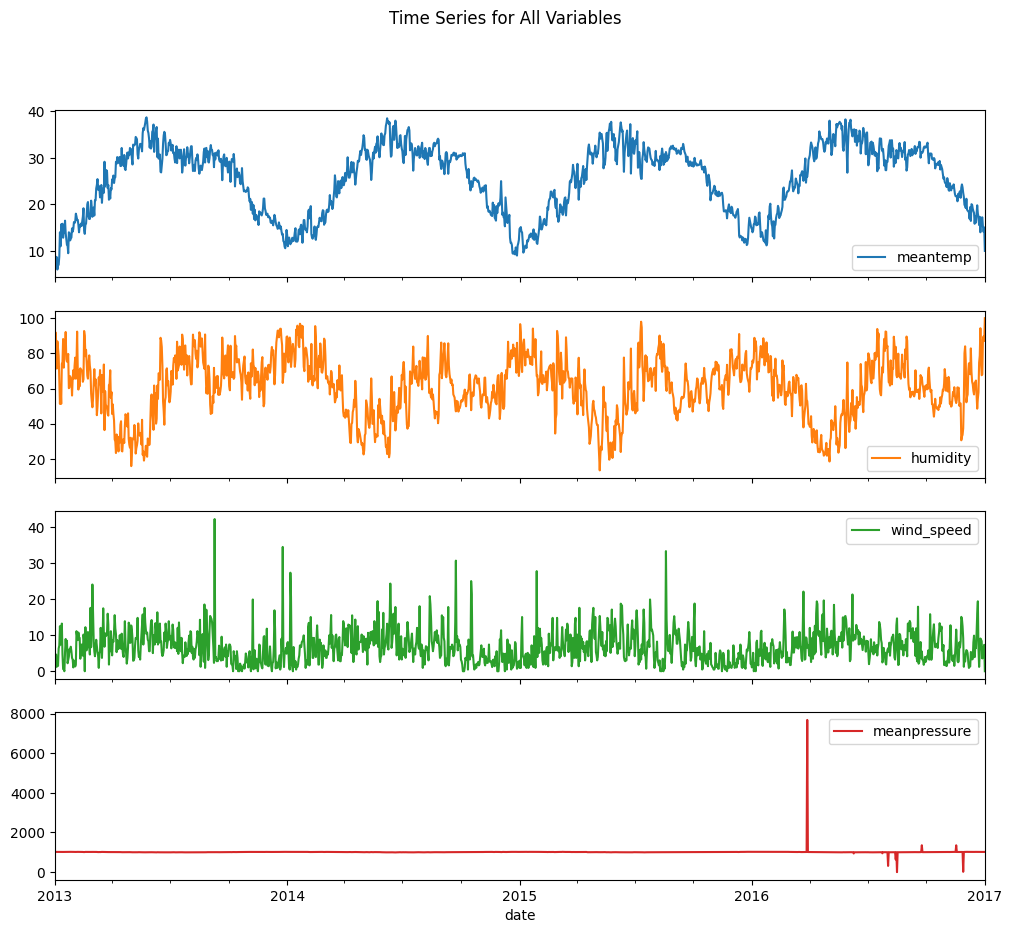

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/DailyDelhiClimateTrain.csv')
# Parse the 'date' column as datetime
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Plot time series for all variables
df[['meantemp', 'humidity', 'wind_speed', 'meanpressure']].plot(subplots=True, figsize=(12, 10), title='Time Series for All Variables')
plt.show()



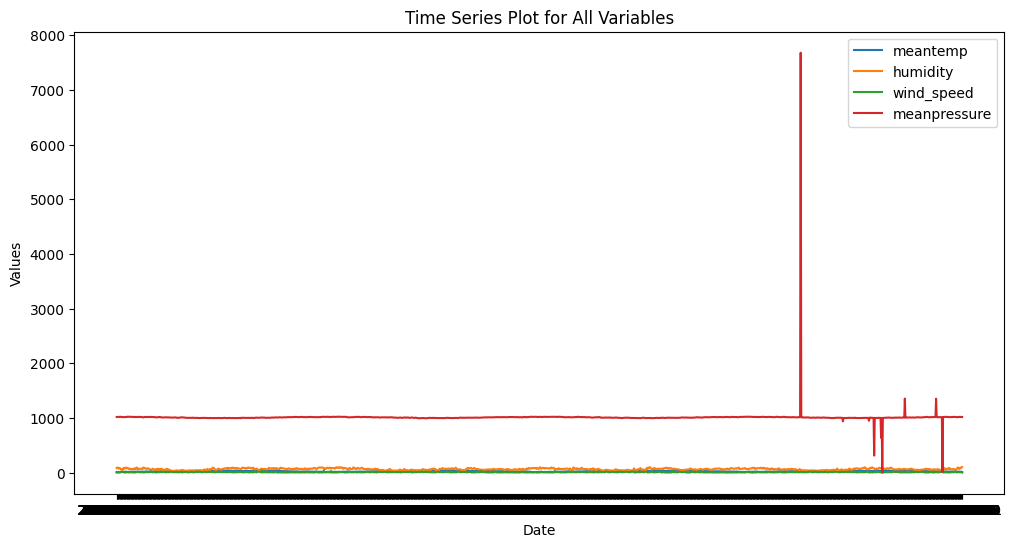

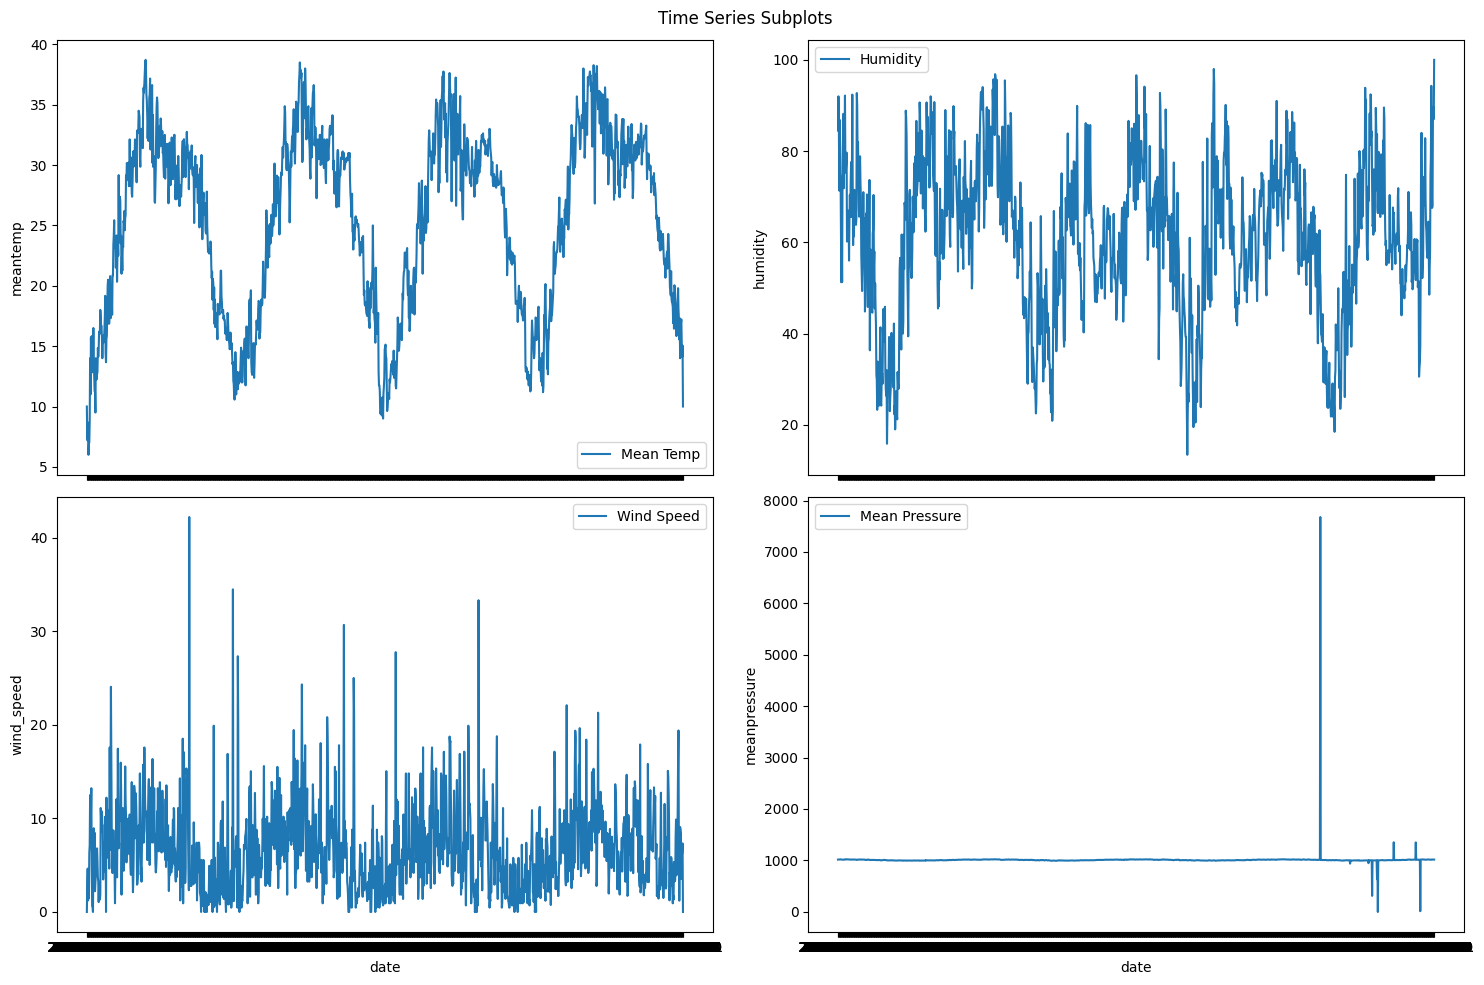

In [ ]:
import seaborn as sns
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/DailyDelhiClimateTrain.csv')
plt.figure(figsize=(12, 6))
for column in ['meantemp', 'humidity', 'wind_speed', 'meanpressure']:
    plt.plot(df['date'], df[column], label=column)
plt.title("Time Series Plot for All Variables")
plt.xlabel("Date")
plt.ylabel("Values")
plt.legend()
plt.show()

# Subplots for relationships
fig, axs = plt.subplots(2, 2, figsize=(15, 10), sharex=True)
sns.lineplot(ax=axs[0, 0], x=df['date'], y=df['meantemp'], label="Mean Temp")
print()
sns.lineplot(ax=axs[0, 1], x=df['date'], y=df['humidity'], label="Humidity")
print()
sns.lineplot(ax=axs[1, 0], x=df['date'], y=df['wind_speed'], label="Wind Speed")
print()
sns.lineplot(ax=axs[1, 1], x=df['date'], y=df['meanpressure'], label="Mean Pressure")
print()
fig.suptitle("Time Series Subplots")
plt.tight_layout()
plt.show()

**Q3**

***Seasonality and Trends:***

Decompose the time series for daily mean temperature into its components (trend, seasonality, and residuals) using statistical decomposition methods.
Identify any seasonal patterns and discuss their significance.

<Figure size 1000x800 with 0 Axes>

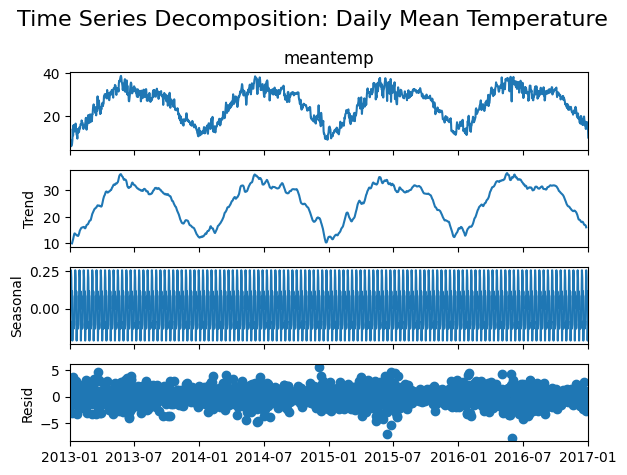

Trend:
 date
2013-01-07     9.976786
2013-01-08    10.446230
2013-01-09    10.987103
2013-01-10    11.516865
2013-01-11    12.169643
Name: trend, dtype: float64

Seasonal Component:
 date
2013-01-01   -0.108320
2013-01-02    0.082409
2013-01-03    0.093744
2013-01-04    0.257785
2013-01-05    0.204781
Name: seasonal, dtype: float64

Residual Component:
 date
2013-01-07   -3.092896
2013-01-08   -1.374060
2013-01-09    3.097963
2013-01-10   -0.398063
2013-01-11    3.635024
Name: resid, dtype: float64


In [ ]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
df = pd.read_csv('/content/drive/MyDrive/DailyDelhiClimateTrain.csv')
# Ensure the 'date' column is in datetime format
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)  # Set 'date' as the index for time series analysis

# Decompose the time series (additive model)
result = seasonal_decompose(df['meantemp'], model='additive', period=12)  # Adjust 'period' based on your data frequency

# Plot the decomposition components
plt.figure(figsize=(10, 8))
result.plot()
plt.suptitle("Time Series Decomposition: Daily Mean Temperature", fontsize=16)
plt.tight_layout()
plt.show()

# Print observations
print("Trend:\n", result.trend.dropna().head())
print("\nSeasonal Component:\n", result.seasonal.head())
print("\nResidual Component:\n", result.resid.dropna().head())


**Q4:**

Select one variable (e.g., daily mean temperature) for forecasting.
Split the dataset into training and testing sets.
Fit Seasonal Decomposition of Time Series (STL) model to the training set.
Evaluate the forecasting performance using Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE).

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Mean Absolute Error (MAE): 7.38
Root Mean Squared Error (RMSE): 8.22


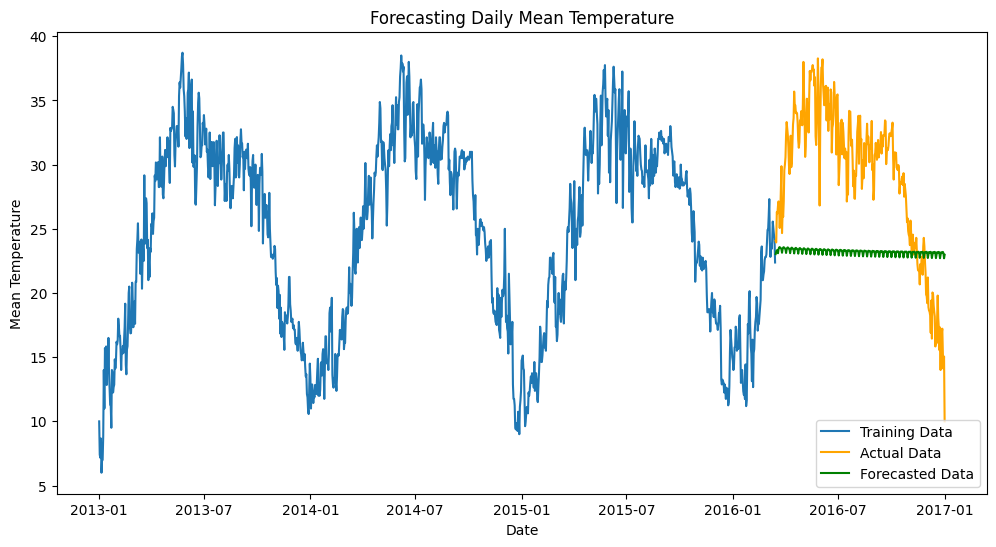

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/DailyDelhiClimateTrain.csv')
# Load and prepare the dataset
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
data = df['meantemp']

# Split into training and testing sets
split_ratio = 0.8
split_index = int(len(data) * split_ratio)
train, test = data[:split_index], data[split_index:]

# Fit STL Decomposition to the training set
stl = STL(train, seasonal=365)  # Adjust seasonal period as per your dataset
stl_result = stl.fit()

# Extract trend and seasonal components
detrended = train - stl_result.seasonal
seasonal_component = stl_result.seasonal

# Fit an ARIMA model to the detrended data
arima_model = ARIMA(detrended, order=(2, 0, 1))  # Adjust ARIMA order as needed
arima_result = arima_model.fit()

# Forecast the detrended data
forecast_detrended = arima_result.forecast(steps=len(test))

# Add back the seasonal component to the forecast
forecast = forecast_detrended + seasonal_component[-len(test):].values

# Evaluate the model performance
mae = mean_absolute_error(test, forecast)
rmse = np.sqrt(mean_squared_error(test, forecast))

# Print evaluation metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train, label="Training Data")
plt.plot(test, label="Actual Data", color="orange")
plt.plot(test.index, forecast, label="Forecasted Data", color="green")
plt.legend()
plt.title("Forecasting Daily Mean Temperature")
plt.xlabel("Date")
plt.ylabel("Mean Temperature")
plt.show()


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.1696
Epoch 2/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0073
Epoch 3/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0048
Epoch 4/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0045
Epoch 5/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0043
Epoch 6/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0043
Epoch 7/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0039
Epoch 8/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0039
Epoch 9/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0039
Epoch 10/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0039
Epoch 11/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0039
Epoch 12/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0038
Epoch 13/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0039
Epoch 14/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0037
Epoch 15/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0036
Epoch 16/50
37/37 ━━━━━━━━━━━━

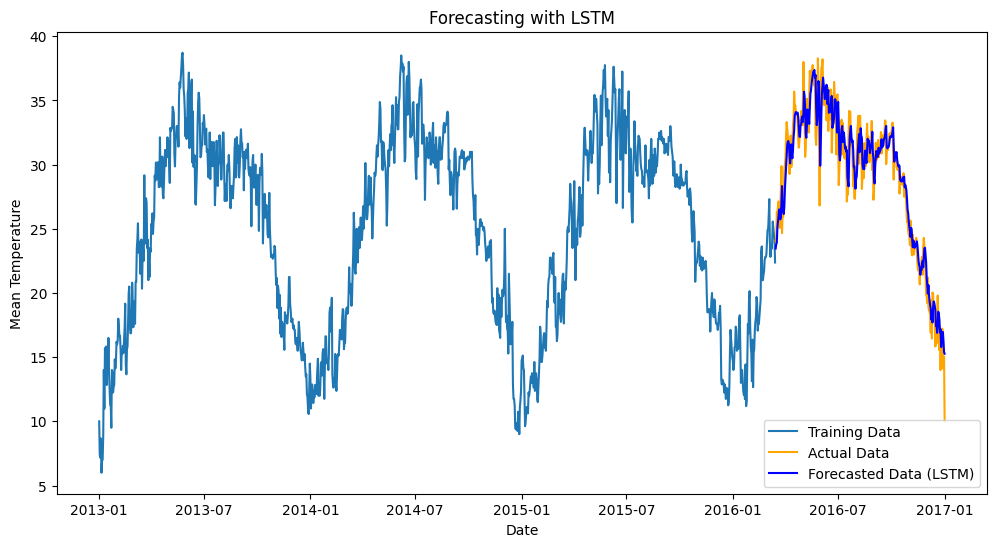

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Scale the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data.values.reshape(-1, 1))

# Prepare data for LSTM
def create_dataset(series, look_back=1):
    X, y = [], []
    for i in range(len(series) - look_back):
        X.append(series[i:(i + look_back)])
        y.append(series[i + look_back])
    return np.array(X), np.array(y)

look_back = 10
X, y = create_dataset(scaled_data, look_back)

# Split into training and testing sets
X_train, X_test = X[:split_index - look_back], X[split_index - look_back:]
y_train, y_test = y[:split_index - look_back], y[split_index - look_back:]

# Reshape for LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build the LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(look_back, 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# Forecast
forecast_lstm = model.predict(X_test)
forecast_lstm = scaler.inverse_transform(forecast_lstm)

# Evaluate
mae_lstm = mean_absolute_error(test[:len(forecast_lstm)], forecast_lstm)
rmse_lstm = np.sqrt(mean_squared_error(test[:len(forecast_lstm)], forecast_lstm))

print(f"LSTM - MAE: {mae_lstm:.2f}")
print(f"LSTM - RMSE: {rmse_lstm:.2f}")

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(train, label="Training Data")
plt.plot(test, label="Actual Data", color="orange")
plt.plot(test.index[:len(forecast_lstm)], forecast_lstm, label="Forecasted Data (LSTM)", color="blue")
plt.legend()
plt.title("Forecasting with LSTM")
plt.xlabel("Date")
plt.ylabel("Mean Temperature")
plt.show()
